In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARMA

In [2]:
data = sm.datasets.co2.load_pandas()
co2 = data.data


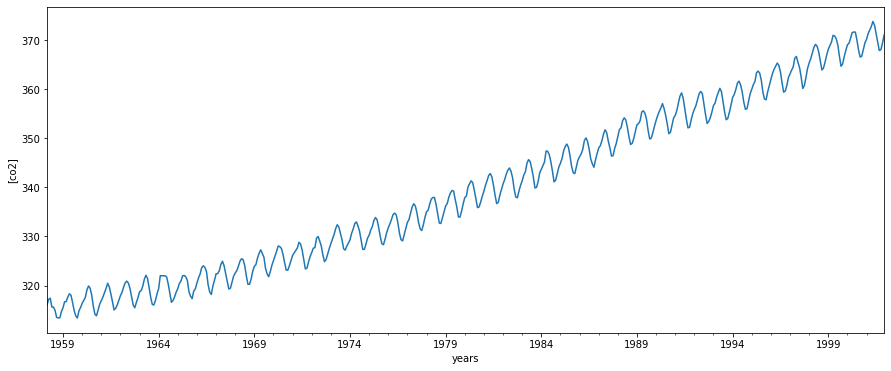

In [3]:
y = co2['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
y.plot(figsize=(15, 6))
plt.xlabel('years')
plt.ylabel('[co2]')
plt.show()


In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


co2_conc_raw=np.array(y)
timeAsInteger=np.arange(1,527)

reg = LinearRegression().fit(timeAsInteger.reshape(-1,1),y)
trend_co2=reg.predict(timeAsInteger.reshape(-1,1))


trend_co2_2= np.polyfit(timeAsInteger, co2_conc_raw, 5) 
detrended_co2 = co2_conc_raw - trend_co2

Text(0, 0.5, '[co2]')

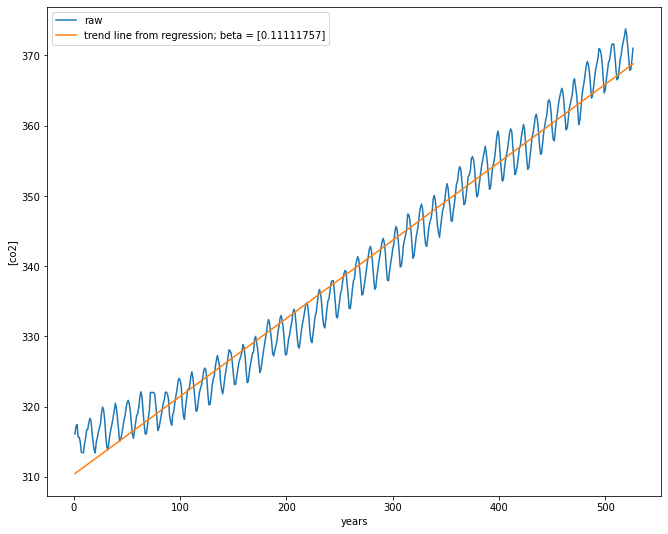

In [5]:
plt.figure()
plt.plot(timeAsInteger,co2_conc_raw)
plt.plot(timeAsInteger,trend_co2)
plt.legend(['raw', 'trend line from regression; beta = ' + str(reg.coef_) ])
plt.xlabel('years')
plt.ylabel('[co2]')

Text(0.5, 1.0, 'Trend Removed')

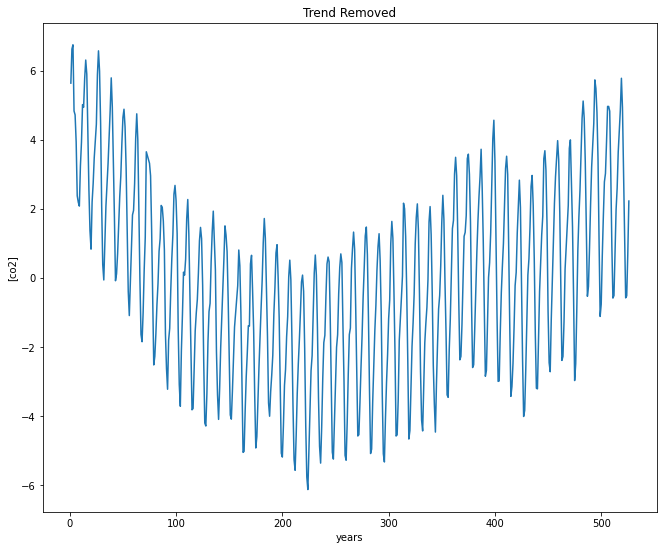

In [6]:
plt.figure()
plt.plot(timeAsInteger,detrended_co2)
plt.xlabel('years')
plt.ylabel('[co2]')
plt.title('Trend Removed')

Text(0, 0.5, 'correlation coefficient')

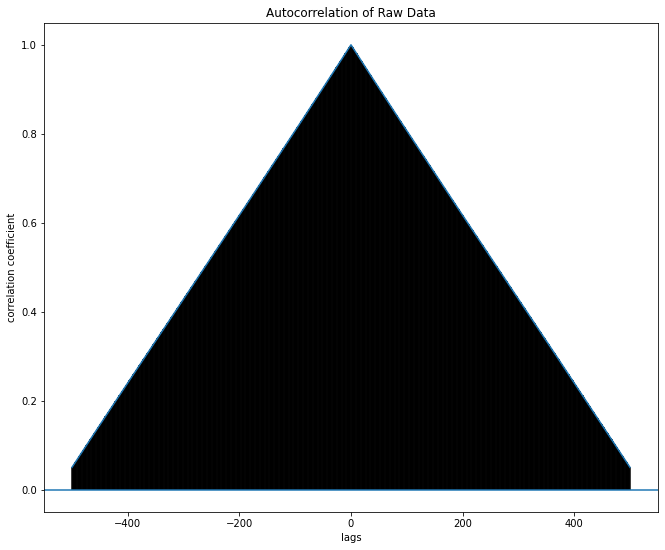

In [7]:
plt.figure()
lags,r,line,b = plt.xcorr(co2_conc_raw,co2_conc_raw,normed=True,maxlags = 500)
fig = plt.plot(lags,r)
plt.title('Autocorrelation of Raw Data')
plt.xlabel('lags')
plt.ylabel('correlation coefficient')


Text(0, 0.5, 'correlation coefficient')

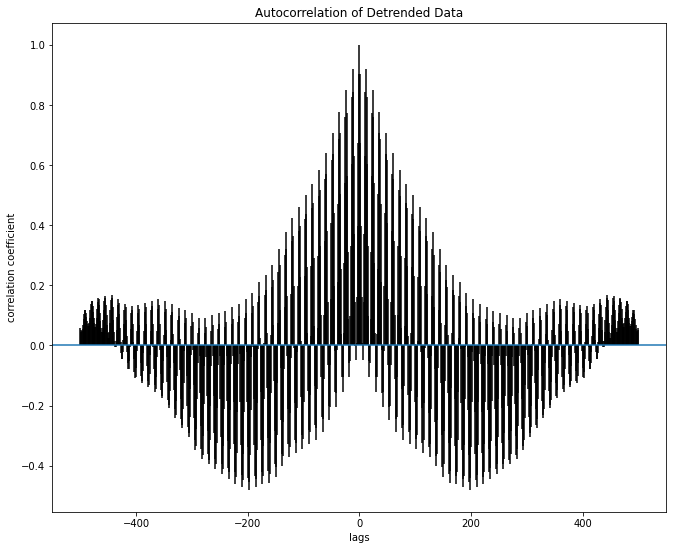

In [8]:
plt.figure()
fig = plt.xcorr(detrended_co2,detrended_co2,normed=True,maxlags = 500)
plt.title('Autocorrelation of Detrended Data')
plt.xlabel('lags')
plt.ylabel('correlation coefficient')


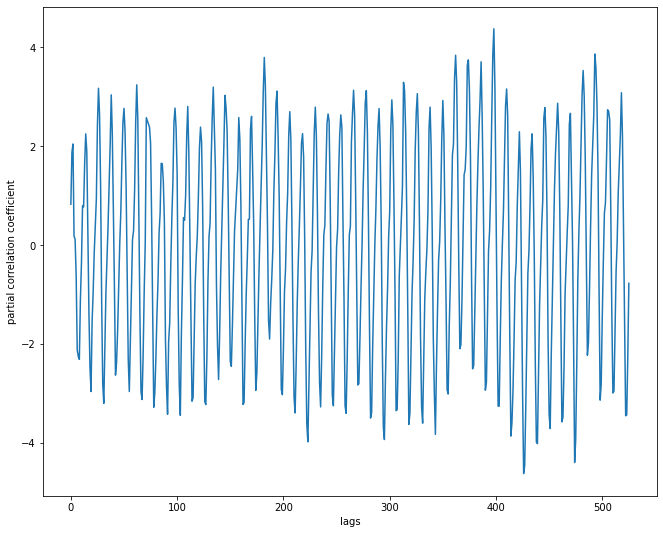

In [9]:
plt.figure()
polycoeffs = np.polyfit(timeAsInteger, co2_conc_raw, 5)
trend_co2=np.polyval(polycoeffs,timeAsInteger)
detrended_co2 = co2_conc_raw - trend_co2
plt.xlabel('lags')
plt.ylabel('partial correlation coefficient')
plt.plot(detrended_co2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  526
Model:                     ARMA(2, 0)   Log Likelihood                -481.794
Method:                       css-mle   S.D. of innovations              0.603
Date:                Sun, 11 Sep 2022   AIC                            971.588
Time:                        23:11:04   BIC                            988.649
Sample:                             0   HQIC                           978.268
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.088      0.027      0.978      -0.169       0.174
ar.L1.y        1.5483      0.023     67.631      0.000       1.503       1.593
ar.L2.y       -0.8484      0.023    -37.115      0.0

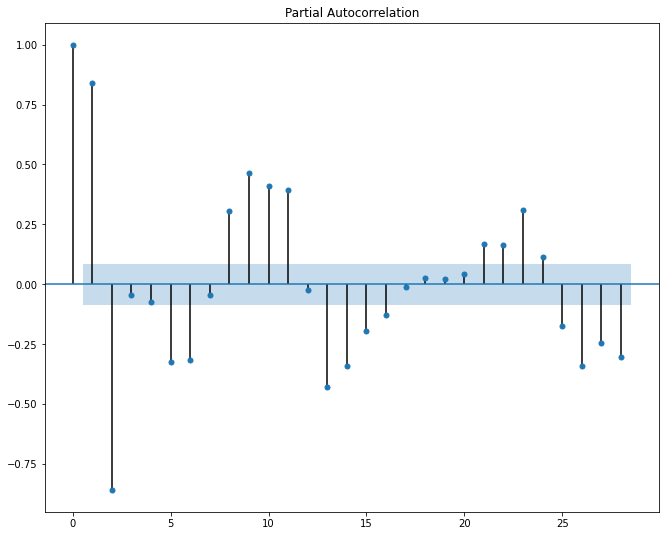

In [10]:
plot_pacf(detrended_co2);
model = ARMA(detrended_co2, order=(2,0))
modelfit=model.fit()
print(modelfit.summary())

seasonalcomponent=modelfit.predict(start=timeAsInteger[0],end=timeAsInteger[-1])


Text(0, 0.5, '[co2]')

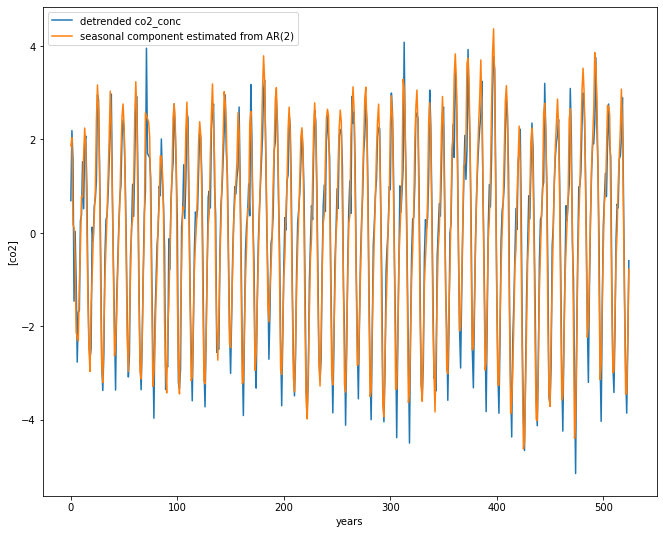

In [11]:
plt.figure()
plt.plot(seasonalcomponent[:-1])
plt.plot(detrended_co2[1:])
plt.legend(['detrended co2_conc', 'seasonal component estimated from AR(2)'])
plt.xlabel('years')
plt.ylabel('[co2]')

Text(0, 0.5, '[co2]')

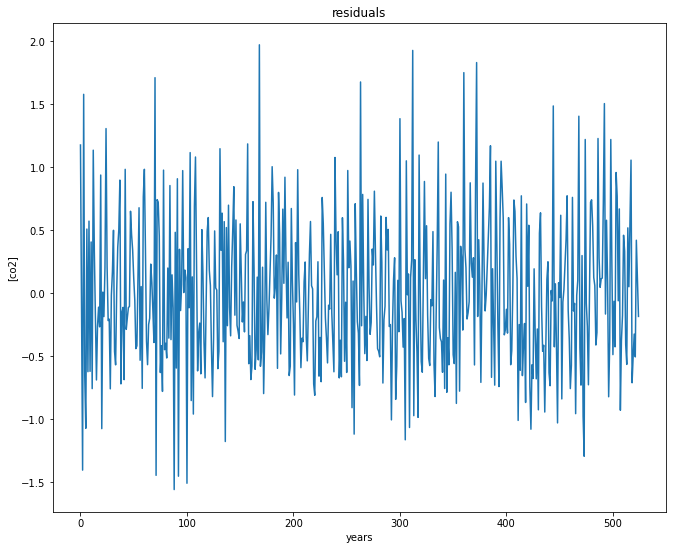

In [12]:
residuals = detrended_co2[1:] - seasonalcomponent[:-1]
plt.figure()
plt.plot(residuals)
plt.xlabel('years')
plt.title('residuals')
plt.ylabel('[co2]')

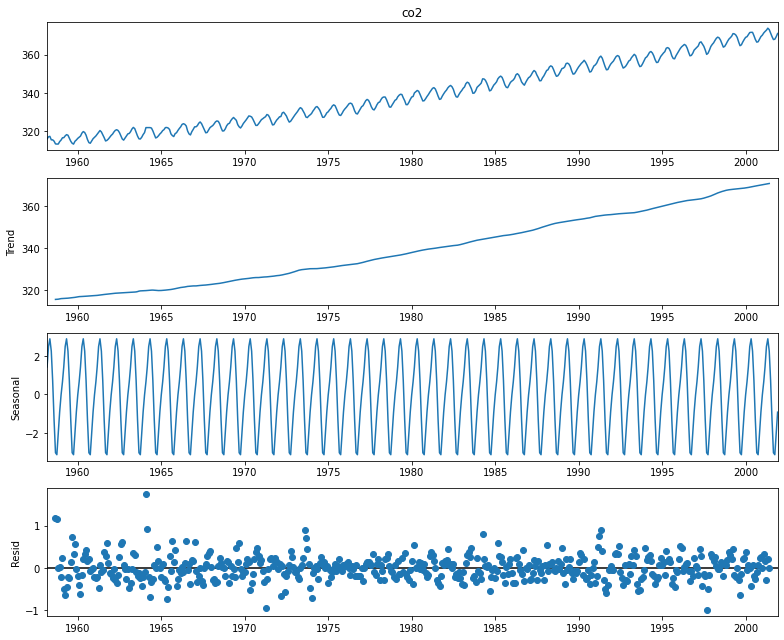

In [13]:
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()